In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

In [2]:
centroids = [(-5,-5), (5,5), (-5,5)]
cluster_std = [1, 1, 1]

X, y = make_blobs(n_samples=100, centers=centroids, cluster_std=cluster_std, random_state=42)

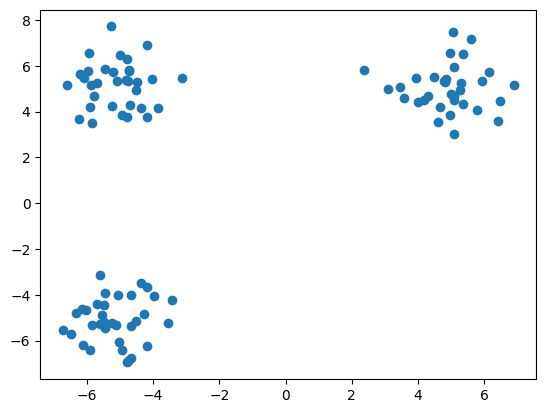

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
class KMean:
  def __init__(self, n_clusters=8, max_iter=300):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None

  def fit_predict(self, X):
    random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
    self.centroids = X[random_index]
    for i in range(self.max_iter):
      # Assign Clusters
      cluster_group = self.assign_clusters(X)
      old_centroids = self.centroids
      # Move Centroids
      self.centroids = self.move_centroids(X, cluster_group)
      # Finish
      if (old_centroids == self.centroids).all():
        break

    return cluster_group


  def assign_clusters(self, X):
    cluster_group = []
    distances = []
    for row in X:
      for centroid in self.centroids:
        distances.append(np.sqrt(np.dot(row-centroid, row-centroid)))
      min_distance = min(distances)
      index_pos = distances.index(min_distance)
      cluster_group.append(index_pos)
      distances.clear()

    return np.array(cluster_group)

  def move_centroids(self, X, cluster_group):
    new_centroids = []

    cluster_type = np.unique(cluster_group)

    for type in cluster_type:
      new_centroids.append(X[cluster_group == type].mean(axis=0))

    return np.array(new_centroids)

In [5]:
km = KMean(n_clusters=3)
clusters = km.fit_predict(X)

In [6]:
df = pd.DataFrame(X, columns=['col1', 'col2'])
df['cluster'] = clusters

In [7]:
df.head()

,col1,col2,cluster
0,-4.526762,4.927171,0
1,-5.839218,-5.309212,2
2,3.081229,4.973486,1
3,-5.479174,-5.185659,2
4,-5.974682,5.787085,0


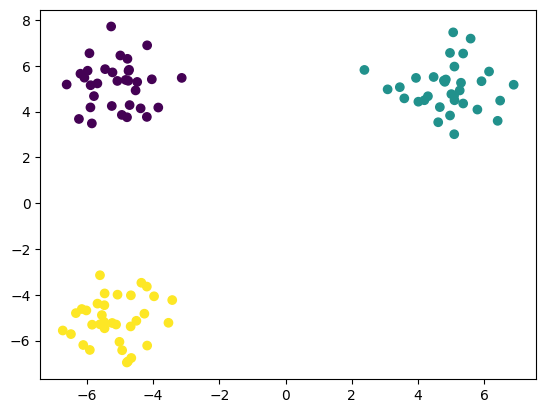

In [8]:
plt.scatter(df['col1'], df['col2'], c=df['cluster'])
plt.show()